In [16]:
import numpy as np
import pandas as pd
import os
import statistics
import surprise

# Load data

In [17]:
# Load users
users_cols = ['user_id', 'age', 'gender', 'occ', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=users_cols)

# Load items
items_cols = ['movie_id', 'movie_title', 'release_date', 'video_release_date',
              'imdb_url', 'unknown', 'action', 'adventure', 'animation',
              'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
              'film-noir', 'horror', 'musical', 'mystery', 'romance', 'sci-fi',
              'thriller', 'war', 'western']
items = pd.read_csv('ml-100k/u.item', sep='|', names=items_cols, encoding='latin-1')

# Load user reviews
data_cols = ['user_id', 'item_id', 'rating', 'timestamp']
user_reviews = pd.read_csv('ml-100k/u.data', sep='\t', names=data_cols)

In [18]:
users

,user_id,age,gender,occ,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [19]:
items

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
user_reviews

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


# Data Visualization

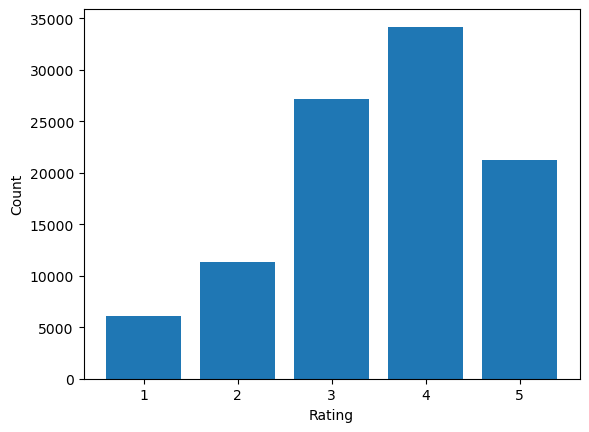

In [21]:
from matplotlib import pyplot as plt

# Visualize ratings
rating_counts = user_reviews['rating'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values)

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
# Show the plot
plt.show()

# Data Preprocessing

In [22]:
from surprise import Dataset, Reader

In [23]:
# Define a reader object for surprise package to parse user_reviews
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(user_reviews[['user_id', 'item_id', 'rating']], reader)
data

# Algorithm Exploration
[Prediction algorithms documentation](https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html)

In [25]:
from surprise import SVD, KNNBasic, CoClustering, SlopeOne, accuracy
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.25, random_state=123)

#### SVD

In [27]:
algo = SVD(random_state=123)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.9322


0.932240731851719

### KNNBasic

In [28]:
algo = KNNBasic(random_state=123)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9763


0.9762605158799611

### CoClustering

In [31]:
algo = SVD(random_state=123)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.9322


0.932240731851719

### SlopeOne

In [34]:
# train and test algorithm.
algo = SlopeOne()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.9431


0.9431396895526429

## Hyper Parameter Tuning

In [15]:
from surprise import SVD, KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, CoClustering, SlopeOne
from surprise.model_selection import GridSearchCV, KFold

In [10]:
# Grid search SVD
svd_grid = {"biased": [True, False], "lr_all": [0.0005, 0.005, 0.05, 0.5], "reg_all": [0.002, 0.002, 0.02, 0.2, 2], "random_state": [123]}
svd_gs = GridSearchCV(SVD, svd_grid, measures=["rmse"], cv=5)
svd_gs.fit(data)

print('===== SVD =====')
svd_best_params = svd_gs.best_params["rmse"]
print(f'best RMSE: {svd_gs.best_score["rmse"]} with parameters: {svd_best_params}')
print()

===== SVD =====
best RMSE: 0.9349879915415633 with parameters: {'biased': True, 'lr_all': 0.005, 'reg_all': 0.02, 'random_state': 123}



In [11]:
# WARNING: long run time
# KNN-based
knn_grid = {'k': [20,40,60], 'min_k': [1,10,100], 'sim_options':{'name': ['cosine', 'msd', 'pearson'], 'user_based': [True, False]}, "random_state": [123]}
knn_gs = GridSearchCV(KNNBasic, knn_grid, measures=["rmse"], cv=5)
knn_gs.fit(data)

print('===== KNN =====')
knn_best_params = knn_gs.best_params["rmse"]
print(f'best RMSE: {knn_gs.best_score["rmse"]} with parameters: {knn_best_params}')
print()

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd sim

In [12]:
# Collaborative Filtering
cf_grid = {'n_cltr_u': [1, 3, 5, 10, 20], 'n_cltr_i':[1,3,5,10,20], "random_state": [123]}
cf_gs = GridSearchCV(CoClustering, cf_grid, measures=["rmse"], cv=5)
cf_gs.fit(data)

print('===== CF =====')
cf_best_params = cf_gs.best_params["rmse"]
print(f'best RMSE: {cf_gs.best_score["rmse"]} with parameters: {cf_best_params}')
print()

===== CF =====
best RMSE: 0.9557247458715675 with parameters: {'n_cltr_u': 20, 'n_cltr_i': 3, 'random_state': 123}



In [13]:
kf = KFold(n_splits=5)
algo = SlopeOne()
rmse_scores = []

for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse_scores.append(accuracy.rmse(predictions, verbose=True))

print('===== SlopeOne =====')
print(f' RMSE: {statistics.mean(rmse_scores)}')
print()

NameError: name 'KFold' is not defined

# Running Best Model

In [ ]:
import os
from surprise import accuracy, Dataset, Reader, SVD
from surprise.model_selection import PredefinedKFold

# Set up the 5 folds from the predefined folds in the dataset

# path to dataset folder
files_dir = os.path.expanduser("ml-100k/")

# This time, we'll use the built-in reader.
reader = Reader("ml-100k")

# folds_files is a list of tuples containing file paths:
# [(u1.base, u1.test), (u2.base, u2.test), ... (u5.base, u5.test)]
train_file = files_dir + "u%d.base"
test_file = files_dir + "u%d.test"
folds_files = [(train_file % i, test_file % i) for i in (1, 2, 3, 4, 5)]

data = Dataset.load_from_folds(folds_files, reader=reader)
pkf = PredefinedKFold()

In [ ]:
def score_model(model):
    rmse_scores = []
    acc_scores = []

    for trainset, testset in pkf.split(data):

        # train and test algorithm.
        model.fit(trainset)
        pred = model.test(testset)

        # Get RMSE
        rmse_scores.append(accuracy.rmse(pred))

        # Get accuracy
        acc = calc_acc([(pred.uid, pred.iid, pred.r_ui, pred.est) for pred in pred])
        acc_scores.append(acc)
        print(f'acc: {acc}')

    avg_rmse = statistics.mean(rmse_scores)
    std_rmse = statistics.stdev(rmse_scores)

    avg_acc = statistics.mean(acc_scores)
    std_acc = statistics.stdev(acc_scores)

    print('RMSE of 5-fold CV:')
    print(f'{avg_rmse} +- {std_rmse}')

    print('Accuracy of 5-fold CV:')
    print(f'{avg_acc} +- {std_acc}')

def calc_acc(predictions):
    correct_predictions = 0
    total_predictions = len(predictions)

    for user_id, item_id, true_rating, predicted_rating in predictions:
        pred_rounded = np.round(predicted_rating)
        if pred_rounded == true_rating:
            correct_predictions += 1

    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

In [ ]:
from surprise import SVD

# Define the best performing model
best_model = SVD(biased=True, lr_all=0.005, reg_all=0.02, random_state = 123)
score_model(best_model)


RMSE: 0.9540
acc: 41.53
RMSE: 0.9387
acc: 41.71
RMSE: 0.9339
acc: 41.88
RMSE: 0.9334
acc: 41.6
RMSE: 0.9330
acc: 41.4
RMSE of 5-fold CV:
0.9386019698228746 +- 0.00892364215214673
Accuracy of 5-fold CV:
41.624 +- 0.18201648277010643
